# ANLY-590 Assignment 1
Yue Han

## 1.Regularization
Using the accompanying Hitters dataset, we will explore regression models to predict a player’s Salary from other variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import preprocessing

%matplotlib inline

In [2]:
# Import the dataset Hitters
Hitters = pd.read_csv("/Users/yuehan/Downloads/ANLY590/Week1/HW1/Hitters.csv")

In [3]:
# Check out dataset
Hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
Hitters.shape

(322, 21)

In [5]:
# Drop NAs
Hitters = Hitters.dropna() 

### 1.1 
#### a) Use LASSO regression to predict Salary from the other numeric predictors.

In [6]:
y = Hitters.Salary # target variable 
X = Hitters.select_dtypes(['number']).drop("Salary", axis=1) #feature variables 
col_names = X.columns # get the features names

In [7]:
# Normalize the features
X_norm = preprocessing.normalize(X)

In [8]:
lasso = Lasso()
lasso.fit(X_norm,y) # fit in Lasso with default paramters

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### b) Create a visualization of the coefficient trajectories.

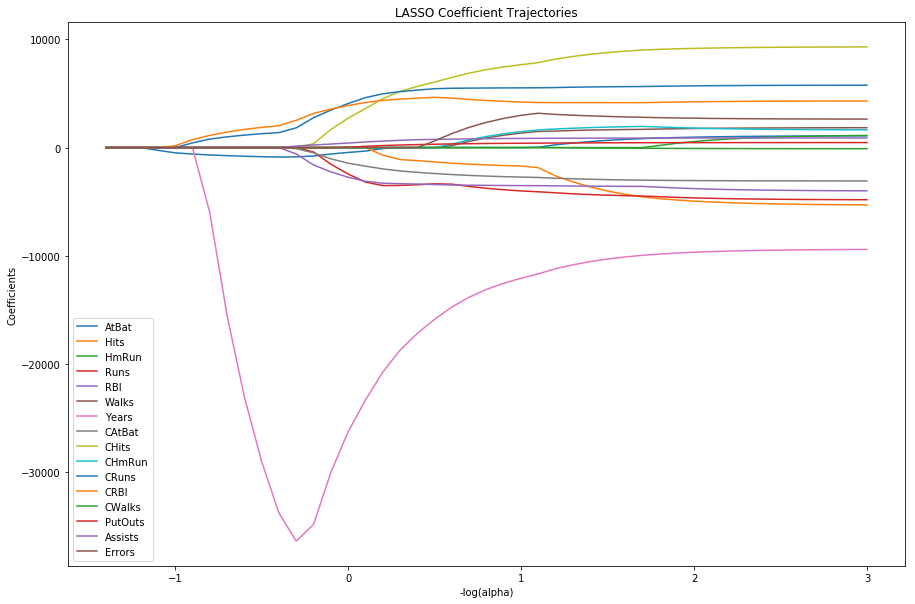

In [9]:
# Create an array of alpha
expo = np.arange(-3, 1.5, 0.1)
alphas = [10**i for i in expo]

# Fit in Lasso with differernt alphas and put the coefficients in to a list. 
coefs = []
for i in alphas:
    coef = Lasso(alpha= i, normalize = True, max_iter=10000).fit(X_norm, y).coef_
    coefs.append(coef)

# Plot the coefficient trajectories
alphas = -np.log10(alphas)
plt.figure(figsize = (15,10))
plt.plot(alphas, coefs)
plt.xlabel('-log(alpha)')
plt.ylabel('Coefficients')
plt.legend(col_names)
plt.title('LASSO Coefficient Trajectories')
plt.show()

#### c) Comment on which are the final three predictors that remain in the model.
From the plot, we can approximately tell that the final three predictors are AtBat, Cruns, and CRBI (or Hits,  same color as CRBI). <br/>
To determine the final three predictors, set -log(alpha) equals to -0.9 in the following way:

In [10]:
coef = Lasso(alpha= 10**(0.9), normalize = True, max_iter=10000).fit(X_norm, y).coef_
print("The final three predictors left are", col_names[abs(coef) != 0].tolist())

The final three predictors left are ['AtBat', 'CRuns', 'CRBI']


#### d) Use cross-validation to find the optimal value of the regularization penality. 

In [11]:
# Use the 10-folds cross validation 
lasso_cv = LassoCV(cv=10, max_iter = 100000).fit(X_norm, y) 
lasso_cv.fit(X_norm,y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [12]:
print("The optimal value of the regularization penalty is alpha equals to", lasso_cv.alpha_)

The optimal value of the regularization penalty is alpha equals to 0.1371821429861081


#### e) How many predictors are left in that model?

In [13]:
coef = Lasso(alpha= lasso_cv.alpha_, normalize = True, max_iter=10000).fit(X_norm, y).coef_

In [14]:
left_num = len(col_names[abs(coef) != 0])
left_var = col_names[abs(coef) != 0].tolist()
print(left_num, "models are lefted in the model when we use 10-folds cross validation. And they are",
     left_var)

13 models are lefted in the model when we use 10-folds cross validation. And they are ['Hits', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts', 'Assists', 'Errors']


### 1.2
#### a) Repeat with Ridge Regression.

In [15]:
ridge = Ridge()
ridge.fit(X_norm,y) # fit in Lasso with default paramters

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### b) Visualize coeffecient trajectories.

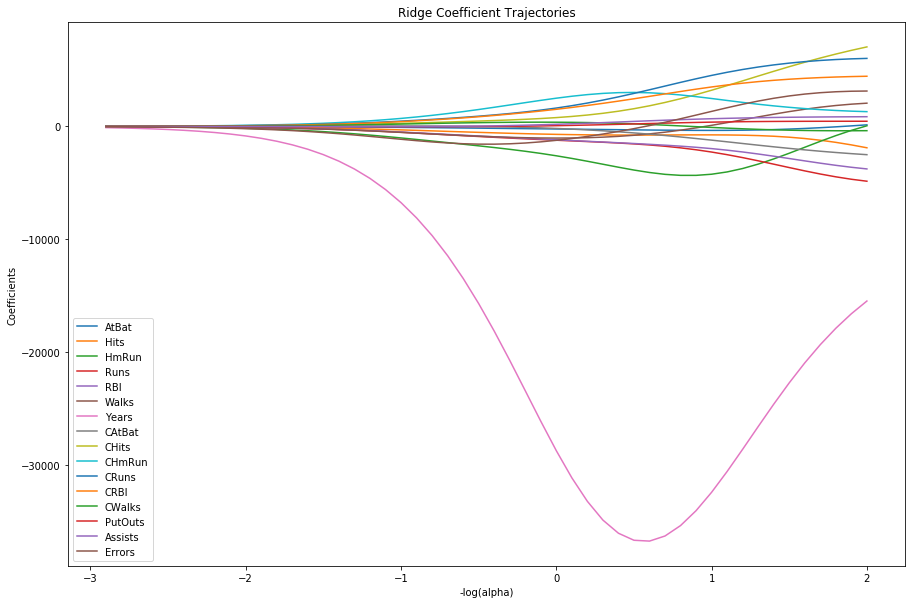

In [16]:
expo = np.arange(-2, 3, 0.1)
alphas = [10**i for i in expo]

# Fit in Ridge with differernt alphas and put the coefficients into a list. 
ridge_coefs = []
for i in alphas:
    coef = Ridge(alpha= i, normalize = True, max_iter=10000).fit(X_norm, y).coef_
    ridge_coefs.append(coef)

# Plot the coefficient trajectories
alphas = -np.log10(alphas)
plt.figure(figsize = (15,10))
plt.plot(alphas, ridge_coefs)
plt.xlabel('-log(alpha)')
plt.ylabel('Coefficients')
plt.legend(col_names)
plt.title('Ridge Coefficient Trajectories')
plt.show()

Unlike Lasso, which lead to zero coefficients so that some of the features are completely neglected for the evaluation of output, Ridge only punish high values of the coefficients so that all variables would remain in the model. 

#### c) Use cross-validation to find the optimal value of the regularization penalty.

In [17]:
# Use the 10-folds cross validation 
ridge_cv = RidgeCV(cv=10).fit(X_norm, y)
ridge_cv.fit(X_norm,y)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [18]:
print("The optimal value of the regularization penalty is alpha equals to", ridge_cv.alpha_)

The optimal value of the regularization penalty is alpha equals to 0.1


## 2. Short Answer
#### a) Explain in your own words the bias-variance tradeoff. 

The prediction error for machine learning algorithm includes the Bias Error and Variance Error. The algorithms have a high bias making them fast to learn and easier to understand but generally less flexible, while the algorithms have a high variance are strongly influenced by the specifics of the training data and have a lot of flexibility. In this case, forming the no escaping relationship between bias and variance in machine learning that increasing the bias will decrease the variance, while increasing the variance will decrease the bias. Although it's not likely to have both low bias and low variance at the same time, but with the goal to achieve the optimal prediction performance, the machine learning algorithm should make a trade-off between bias and variance. 

#### b) What role does regularization play in this tradeoff?

Minimizing error over all possible input means the algorithms must be able to generalize and make accurate predictions on unseen inputs. Regularization in simple terms is a process of introducing additional information in order to solve an ill posed problem or to prevent overfitting. We want to penalize or adjust each weights of the independent variables so that it makes a good prediction on test set that it has not seen before. Regularization will help select a midpoint between the first scenario of high bias and the later scenario of high variance. 

#### c) Make reference to your findings in number (1) to describe models of high/low bias and variance.

In our question, The LASSO regression uses L1 regularization technique as penalty on the size of coefficients, it aims to minimize the absolute sum of residual. When the penalty increases, the value of coefficients of each feautures will be shrinked respectively, so the variance decreases while bias increases. It can also be considered as a feature selection method as coefficients will be shrinked to zero one by one when penalty increases. On the other hand, if penalty decreases, the variance will increase and bias will decrease.

From the lasso coefficient trajectories plots, the smaller penalty(alpha) is, the larger the weight of coefficients, which may cause overfitting. The larger penalty(alpha) is, the smaller the weight of coefficients, which can reduce the complexity of the model.